In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set_context("talk")
sns.set_style("white")

In [3]:
afr_prs = pd.read_csv("../kaiser/kaiser_afr_prca_prs.txt",sep="\t",index_col = 0)
afr_prs["ANC"] = "AFR"
eur_prs = pd.read_csv("../kaiser/kaiser_eur_prca_prs.txt",sep="\t",index_col = 0)
eur_prs["ANC"] = "EUR"

In [4]:
all_prs = pd.concat([eur_prs,afr_prs])

In [5]:
all_prs["SCORESUM_NORM"] = stats.zscore(all_prs["SCORESUM"])

In [6]:
eur_prs_norm = all_prs.loc[all_prs["ANC"]=="EUR"]
afr_prs_norm = all_prs.loc[all_prs["ANC"]=="AFR"]

In [15]:
def plot_pair_hist(dfs,labels,ax,colors,title):
    for i in range(len(labels)):
        sns.distplot(dfs[i],label=labels[i],hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 6},ax=ax,color=colors[i])
        ax.set_xlabel("",fontsize=40)
#         ax.set_ylabel("Density",fontsize=36)
        ax.tick_params(axis='both', which='major', labelsize=38)
        ax.tick_params(axis='both', which='minor', labelsize=38)
        ax.set_xlim(-4,4)
        ax.legend(loc=1,frameon=False,fontsize=32)
    ax.set_title(title,fontsize=40)

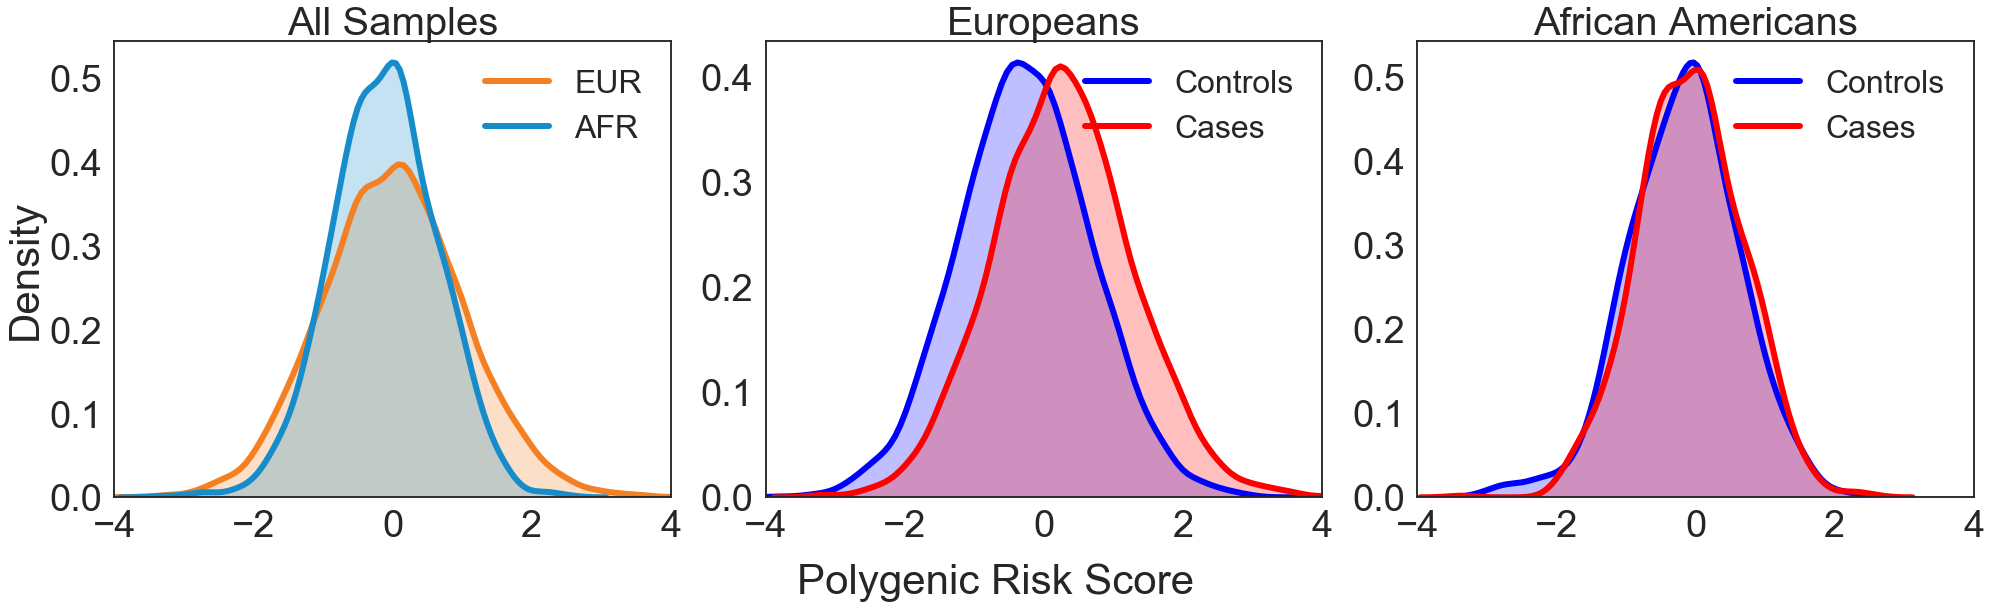

In [18]:
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(28,8))

plot_pair_hist([eur_prs_norm["SCORESUM_NORM"],afr_prs_norm["SCORESUM_NORM"]],
              ["EUR","AFR"], ax[0], ["#F48024","#178CCB"], "All Samples")

plot_pair_hist([eur_prs_norm.loc[eur_prs_norm["PHENO"]==1,"SCORESUM_NORM"],eur_prs_norm.loc[eur_prs_norm["PHENO"]==2,"SCORESUM_NORM"]],
              ["Controls","Cases"],ax[1],["blue","red"], "Europeans")

plot_pair_hist([afr_prs_norm.loc[afr_prs_norm["PHENO"]==1,"SCORESUM_NORM"],afr_prs_norm.loc[afr_prs_norm["PHENO"]==2,"SCORESUM_NORM"]],
              ["Controls","Cases"],ax[2],["blue","red"], "African Americans")


ax[0].set_ylabel("Density",fontsize=42)
fig.suptitle("Polygenic Risk Score",y=0,fontsize=42)
plt.tight_layout()
plt.savefig("/Users/taylorcavazos/Documents/Posters/ASHG2019/alt_layout_1/result3.png",type="png",dpi=1000,bbox_inches="tight")
plt.show()

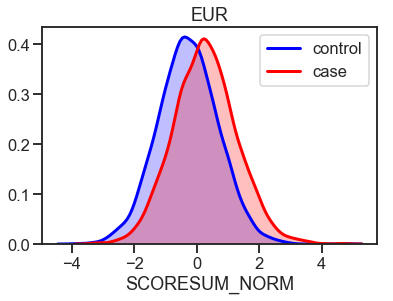

In [17]:
sns.distplot(eur_prs_norm.loc[eur_prs_norm["PHENO"]==1,"SCORESUM_NORM"],color="blue",label="control",hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(eur_prs_norm.loc[eur_prs_norm["PHENO"]==2,"SCORESUM_NORM"],color="red",label="case",hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
plt.title("EUR")
plt.legend()
plt.show()

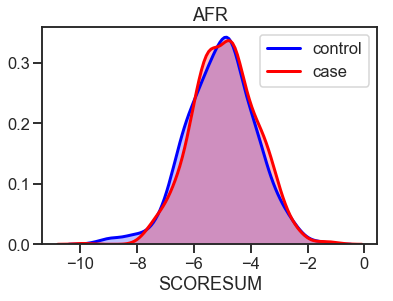

In [71]:
sns.distplot(afr_prs_norm.loc[afr_prs_norm["PHENO"]==1,"SCORESUM"],color="blue",label="control",hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(afr_prs_norm.loc[afr_prs_norm["PHENO"]==2,"SCORESUM"],color="red",label="case",hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
plt.title("AFR")
plt.legend()
plt.show()